In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from pylab import imshow, show, get_cmap

class Unets(object):
    r"""Apply Unets denoising.

    Parameters
    ----------
    model: str
        Which denoising algorithm to use.

    """

    def __init__(self, items=None):
        r"""Initialize class attributes."""
        self.model = keras.models.load_model('saving_unets')
        
    def convert_and_pad(self, image):
        r"""Convert images to 64x64x1 shaped tensors to feed the model, using zero-padding."""
        image = tf.reshape(tf.convert_to_tensor(img), 
                           [np.shape(img)[0], np.shape(img)[1], np.shape(img)[2], 1])
        #pad = tf.constant([[0,0], [6,7],[6,7], [0,0]])
        #return tf.pad(image, pad, "CONSTANT")
        return image
       
      
    def crop_and_convert(self, image):
        r"""Crop back the image to its original size and convert it to np.array"""
        image = tf.reshape(tf.image.crop_to_bounding_box(image, 6, 6, 51, 51), [np.shape(img)[0], 51, 51])
        return image.numpy()

    def op(self, image, **kwargs):
        r"""Apply Unets denoising."""
        # Threshold all scales but the coarse
        image = self.convert_and_pad(image)
        image = self.model.predict(image)
        return self.crop_and_convert(image)
    
    def predict(self, image, **kwargs):
        return self.model.predict(image)

    def cost(self, x, y):
        r"""Return cost."""
        return 0

ModuleNotFoundError: No module named 'mccd.proxs'; 'mccd' is not a package

In [8]:
learnlets = Unets()

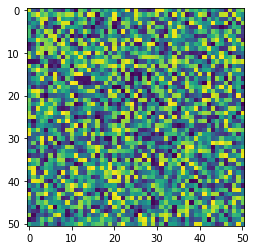

In [20]:
img = np.random.rand(10,51,51)
imshow(img[0])

(10, 64, 64, 1)


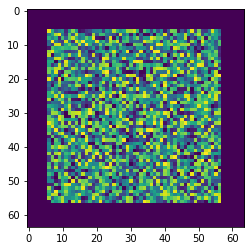

In [20]:
#### Convert the images to tensors, and padding them to get to 64x64 images. 
#### [0,0] on the batch size and number of channels
img = learnlets.convert_and_pad(img)
print(np.shape(img))
imshow(img[0])


(10, 51, 51)


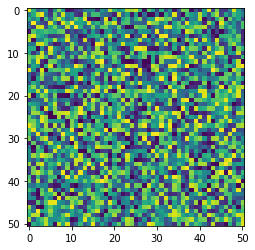

In [21]:
#### Crop back the images to 51x51

img = learnlets.crop_and_convert(img)
print(np.shape(img))
imshow(img[0])

In [18]:
#### Test the model denoising with the op function

img = learnlets.op(img)
print(np.shape(img))
imshow(img[0])

ValueError: in user code:

    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/keras/saving/saved_model/utils.py:69 return_outputs_and_add_losses
        outputs, losses = fn(*args, **kwargs)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/eager/def_function.py:889 __call__
        result = self._call(*args, **kwds)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/eager/def_function.py:924 _call
        results = self._stateful_fn(*args, **kwds)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/eager/function.py:3022 __call__
        filtered_flat_args) = self._maybe_define_function(args, kwargs)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/eager/function.py:3397 _maybe_define_function
        self._function_spec.canonicalize_function_inputs(*args, **kwargs)
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/eager/function.py:2775 canonicalize_function_inputs
        inputs, flat_inputs, filtered_flat_inputs = _convert_inputs_to_signature(
    /Users/oa265351/opt/miniconda3/envs/denoising/lib/python3.9/site-packages/tensorflow/python/eager/function.py:2877 _convert_inputs_to_signature
        raise ValueError("Python inputs incompatible with input_signature:\n%s" %

    ValueError: Python inputs incompatible with input_signature:
      inputs: (
        Tensor("unet/Cast:0", shape=(None, 64, None, 1), dtype=float32))
      input_signature: (
        TensorSpec(shape=(None, 51, 51, 1), dtype=tf.float32, name='input_1'))


In [13]:
np.shape(img)

(10, 51, 51)